In [ ]:
#required packages
import numpy as np
import matplotlib.pyplot as plt # only pyplot module was imported
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns # the whole library was imported

In [ ]:
#loading dataset
iris = load_iris()
x = iris.data
feature_names = iris.feature_names
y = iris.target
target_names = iris.target_names
print("Feature names:", feature_names)
print("\nTarget names [Classes]:", target_names)
print("\nDataset shape:", x.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names [Classes]: ['setosa' 'versicolor' 'virginica']

Dataset shape: (150, 4)


In [ ]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#test_train_split into 70% training set and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

print("Decision Tree Classifier Results:")
print("\nAccuracy:", accuracy_score(y_test, dt_predictions))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions, target_names=target_names))

Decision Tree Classifier Results:

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**The Gini index**, also known as Gini impurity, is a metric used in decision trees to measure the impurity or disorder of a set of samples. In the context of a decision tree node, it quantifies how mixed the classes are within that node.

**Pure node:** If a node contains samples from only one class, its Gini index is 0, indicating perfect purity.

**Impure node:** If a node contains samples from multiple classes, its Gini index is greater than 0, indicating impurity. The higher the Gini index, the more mixed the classes are.

Decision tree algorithms like the one you used aim to split the data at each node in a way that minimizes the Gini index of the resulting child nodes. This means they try to create splits that result in purer subsets of data, making it easier to classify the samples.

In the current decision tree plot, you can see the "gini" value at each node, which represents the Gini index for the samples in that node before the split. The algorithm chooses the split that best reduces this impurity.



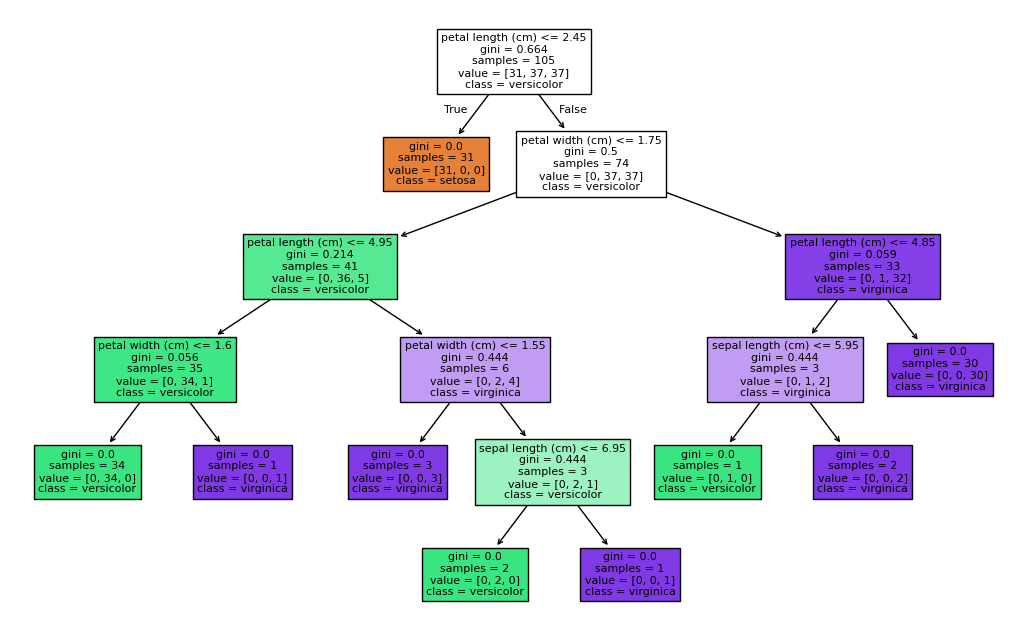

In [ ]:
plt.figure(figsize=(13, 8))
plt.title("Decision Tree Classifier")
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)

print("Naive Bayes Classifier Results:")
print("\nAccuracy:", accuracy_score(y_test, nb_predictions))
print("\nClassification Report:\n", classification_report(y_test, nb_predictions, target_names=target_names))

Naive Bayes Classifier Results:

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



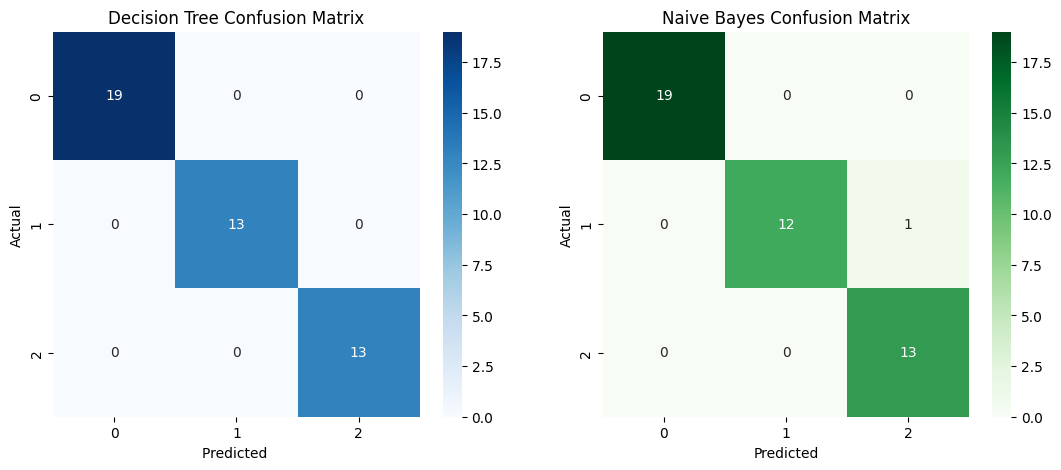

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted ')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

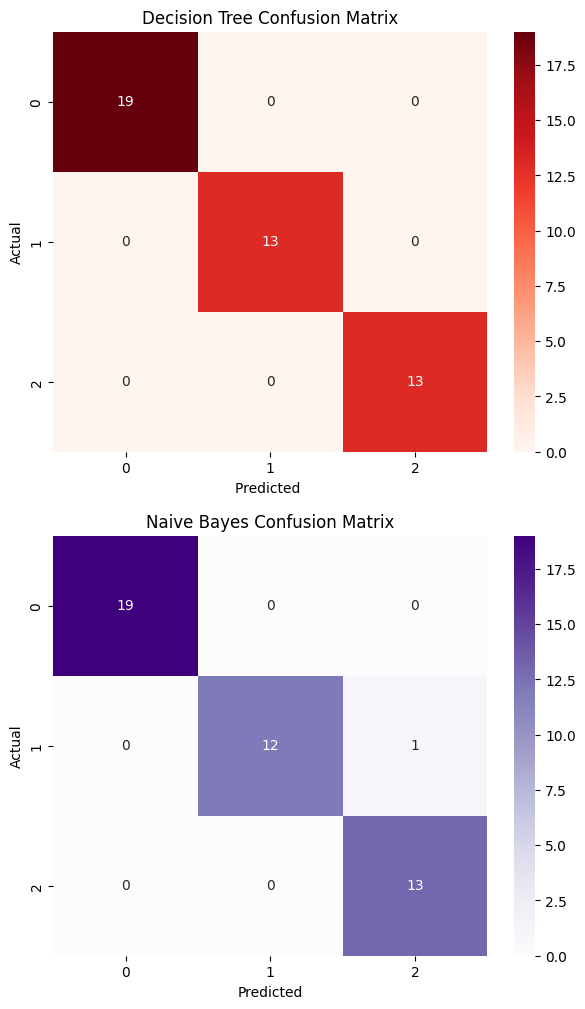

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 12))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted ')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()